In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

current_dir = os.getcwd()

#import dataset
df = pd.read_csv('../data/datatraining.txt', delimiter=',')

#parse date column as datetime
df['date'] = pd.to_datetime(df['date'])

#extract hour & min to new separate columns
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

#keep date only in 'date' column
#df['date'] = df['date'].dt.date

#reorder columns
df.insert(1, 'hour', df.pop('hour'))
df.insert(2, 'minute', df.pop('minute'))

#display df header
print(df.head()) 



                 date  hour  minute  Temperature  Humidity  Light     CO2  \
1 2015-02-04 17:51:00    17      51        23.18   27.2720  426.0  721.25   
2 2015-02-04 17:51:59    17      51        23.15   27.2675  429.5  714.00   
3 2015-02-04 17:53:00    17      53        23.15   27.2450  426.0  713.50   
4 2015-02-04 17:54:00    17      54        23.15   27.2000  426.0  708.25   
5 2015-02-04 17:55:00    17      55        23.10   27.2000  426.0  704.50   

   HumidityRatio  Occupancy  
1       0.004793          1  
2       0.004783          1  
3       0.004779          1  
4       0.004772          1  
5       0.004757          1  


### What are the dimensions? (no. of rows/columns)

In [5]:
df.shape

(8143, 9)

There are 8143 rows and 9 columns, including the hour and minute columns (added)

### Identify the target variable and predictors. Are you dropping any columns that will not contribute to further analysis/modelling process?

The main target is the occupancy feature. The primary goal is to predict whether a room is occupied or not based on different environmental factors. As for dropping columns, the id/index column is not necessary. It's also possible to drop the date column entirely if time-related trends won't be relevant for the analysis and alternative hypothesis. Other variables may also be dropped if there are values with very high colinearity.

### Your understanding of what each feature means/indicates.

1. index - unique sequential primary key for each feature
2. date - the date when data was recorded
3. temperature - the recorded temperature of the room, measured in degrees Celsius
4. humidity- the humidity levof the room, in percentages
5. light- the measure of light levels in the room, which is evaluated in lux units
6. carbon dioxide - the amount of cabon dioxide or CO₂ of the room, expressed in ppm or parts per million
7. humidityratio - the proportion of water vapor mass to dry air mass in the room
8. occupation - the target variable, which signifies whether a room is occupied or not (1 or 0)

### Can your features be grouped in any meaningful way for analysis? (demographic, clinical, environmental, test, etc.)

Environmental- temperature, humidity, light, carbon dioxide, humidityratio\
Time-Dependent Features - date, hour, day\
Raw vs Processed Features - \
Raw: temperature, humidity, light, co2 Processed: humidityratio, date, day, hour\
Occupancy-Related Features - carbon dioxide, light, temperature, humidity

The data can be grouped in different ways as described above. It's important to make sure there is a grouping for environmental features since these will be the main predictors for a room's comfort and occupancy. Temporal patterns may also be necessary to help understand the time a room is most likely to be occupied. Direct environmental measurements like raw features and processed features may also provide meaningful insights for modeling. Lastly, occupancy-related features might also be essential to determine whether there is a direct correlation with human presence and different environmental factors.

### Histogram/Boxplot for numerical features

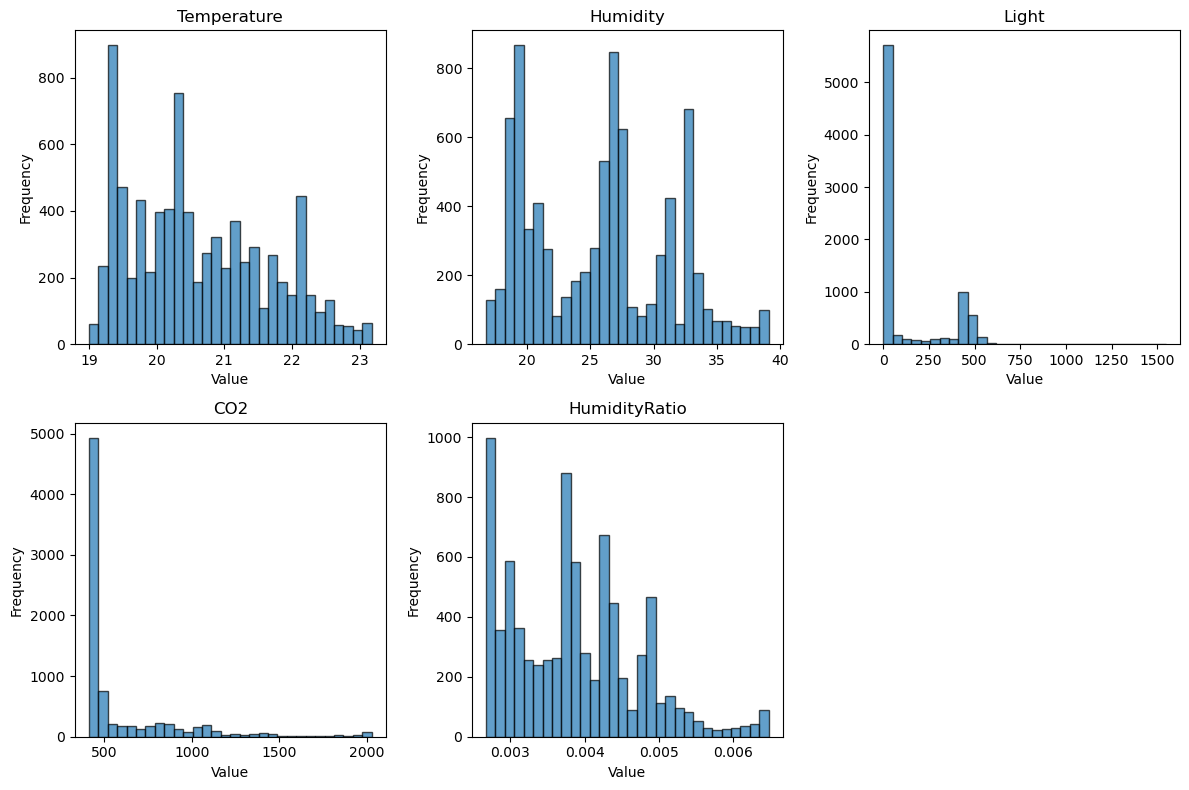

In [9]:
#create columns for numerical data and columns to exclude
excluded_columns = ["date", "hour", "minute", "index", "Occupancy"]
numerical_columns = [col for col in df.select_dtypes(include=['number']).columns if col not in excluded_columns]

#create histogram for each numerical column:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    plt.hist(df[column], bins=30, edgecolor='black', alpha=0.7)
    plt.title(column)
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**Brief Analysis**
* Majority of variables appear to display right-skewed data. In variables such as CO2 and Light, most of the data points cluster around the lower-end values, suggesting that there are a few extreme high values or outliers
* Temperature, humidity, and humidityratio have multiple high peaks indicating a multimodal nature. These peaks suggest the presence of different environmental or temporal conditions where these variables are likely to exhibit higher values